In [ ]:
# Demo Project for SVM, inspired by the YT-Series "Data Science with Python" by Siraj Raval

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
%matplotlib inline

In [2]:
#creating dataframa with 5yrs of S&P500 Data
df=pd.read_csv('sup500.csv')

In [3]:
#checking out the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17261 entries, 0 to 17260
Data columns (total 7 columns):
Date         17261 non-null object
Open         17261 non-null float64
High         17261 non-null float64
Low          17261 non-null float64
Close        17261 non-null float64
Adj Close    17261 non-null float64
Volume       17261 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 944.0+ KB


In [5]:
#we just need price(close) and date
df=df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.columns=['Date', 'Price']
df.head()

,Date,Price
0,1950-01-03,16.66
1,1950-01-04,16.85
2,1950-01-05,16.93
3,1950-01-06,16.98
4,1950-01-09,17.08


In [6]:
#for simplicity convert the date to workdays since 1950
df['Date']=np.arange(df['Date'].count())
df.head()

,Date,Price
0,0,16.66
1,1,16.85
2,2,16.93
3,3,16.98
4,4,17.08


In [7]:
# defining three different support vector regression models
svr_lin = SVR(kernel= 'linear', C= 1e3, cache_size=7000)
svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) 

In [8]:

date=df['Date']
price=df['Price']
date=date.values.reshape(-1,1)

In [9]:
#scaling the Data
from sklearn import preprocessing
date = preprocessing.scale(date)

C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# fitting the data to the models
svr_lin.fit(date, price) 
svr_poly.fit(date, price) 
svr_rbf.fit(date, price) 

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
timeline=np.linspace(-2,3,len(price))
timeline=timeline.reshape(-1,1)


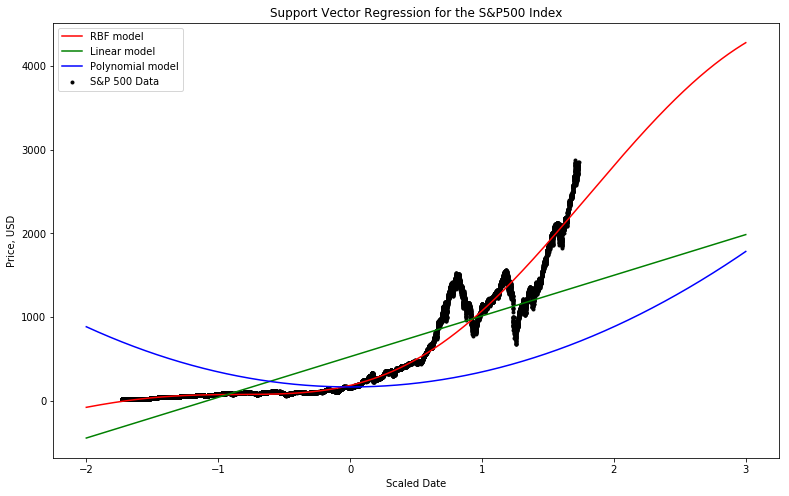

In [13]:
plt.figure(figsize=[13,8])
plt.scatter(date, price, color= 'black', label= 'S&P 500 Data', marker='.') # plotting the initial datapoints 
plt.plot(timeline, svr_rbf.predict(timeline), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
plt.plot(timeline,svr_lin.predict(timeline), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
plt.plot(timeline,svr_poly.predict(timeline), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
plt.xlabel('Scaled Date')
plt.ylabel('Price, USD')
plt.title('Support Vector Regression for the S&P500 Index')
plt.legend()
plt.show()